In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [36]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [39]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [41]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [42]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [43]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [44]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [46]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 5ms/step - loss: 0.6104 - accuracy: 0.7066 - val_loss: 0.5308 - val_accuracy: 0.7950
Epoch 2/100
128/128 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.7956 - val_loss: 0.4855 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.7958 - val_loss: 0.4588 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4412 - accuracy: 0.7970 - val_loss: 0.4388 - val_accuracy: 0.8050
Epoch 5/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4225 - accuracy: 0.8102 - val_loss: 0.4268 - val_accuracy: 0.8194
Epoch 6/100
128/128 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8227 - val_loss: 0.4165 - val_accuracy: 0.8244
Epoch 7/100
128/128 [==============================] - 0s 4ms/step - loss: 0.3977 - accuracy: 0.8336 - val_loss: 0.4068 - val_accuracy: 0.8275

In [51]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [52]:
y_pred


array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [53]:
y_pred = y_pred.argmax(axis=-1)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_ann=accuracy_score(y_test,y_pred)

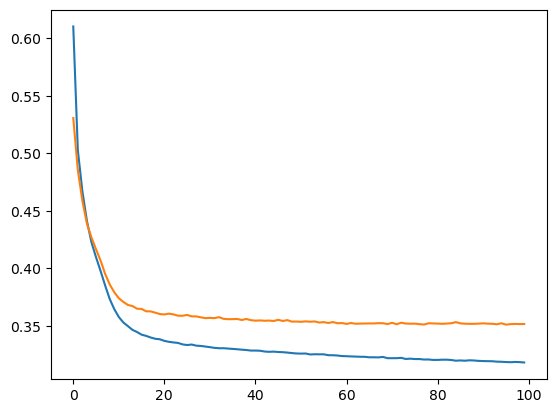

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

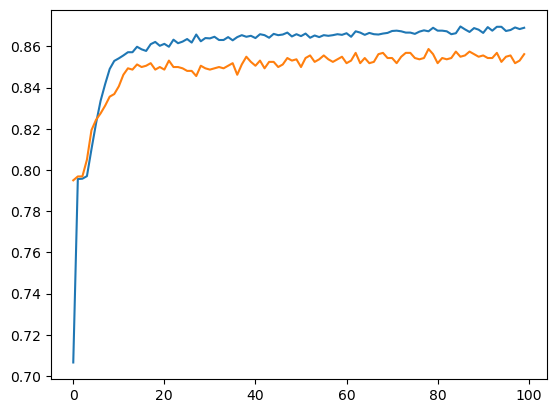

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [57]:
from xgboost import XGBClassifier

In [58]:
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model.fit(X_train_trf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [59]:
y_pred_xgboost = model.predict(X_test_trf)

In [60]:
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)

In [61]:
accuracy_xgboost

0.8645

In [62]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D


In [63]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=11))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
model.fit(X_train_trf, y_train, epochs=100, batch_size=50, validation_split=0.2)


Epoch 1/100
128/128 [==============================] - 7s 36ms/step - loss: 0.4947 - accuracy: 0.7956 - val_loss: 0.4744 - val_accuracy: 0.8069
Epoch 2/100
128/128 [==============================] - 4s 29ms/step - loss: 0.4679 - accuracy: 0.8150 - val_loss: 0.4580 - val_accuracy: 0.8188
Epoch 3/100
128/128 [==============================] - 4s 30ms/step - loss: 0.4602 - accuracy: 0.8189 - val_loss: 0.4582 - val_accuracy: 0.8144
Epoch 4/100
128/128 [==============================] - 4s 29ms/step - loss: 0.4546 - accuracy: 0.8208 - val_loss: 0.4550 - val_accuracy: 0.8194
Epoch 5/100
128/128 [==============================] - 4s 28ms/step - loss: 0.4580 - accuracy: 0.8194 - val_loss: 0.4511 - val_accuracy: 0.8200
Epoch 6/100
128/128 [==============================] - 4s 30ms/step - loss: 0.4537 - accuracy: 0.8205 - val_loss: 0.4488 - val_accuracy: 0.8206
Epoch 7/100
128/128 [==============================] - 4s 32ms/step - loss: 0.4507 - accuracy: 0.8214 - val_loss: 0.4550 - val_accuracy:

In [66]:
y_pred_probs = model.predict(X_test_trf)
y_pred = (y_pred_probs > 0.5).astype(int)

63/63 [==============================] - 0s 5ms/step


In [68]:
accuracy_lstm=accuracy_score(y_test, y_pred)

In [69]:
print(accuracy_lstm)
print(accuracy_xgboost)
print(accuracy_ann)

0.809
0.8645
0.7975
